# Stroke Prediction

Group 14
Group member: Xichen Liu, Duo Zhao, Keming Xu, Wenshu Yang, Rodolph Mesadieu

In [31]:
# Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Pre-processing

Read data and general view

In [4]:
stroke_data = pd.read_csv('healthcare-dataset-stroke-data.csv')
print(f'Shape of dataset: {stroke_data.shape}')
stroke_data.head()

Shape of dataset: (5110, 12)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


*Feature description:*
> * **id**: Unique identifier
> * **gender**: Male, Female, or Other
> * **age**: Age of the patient
> * **hypertension**: If the patient has hypertension
> * **heart_disease**: If the patient has any heart diseases
> * **ever_married**: If the patient has ever get married
> * **work_type**: Types of patients' jobs
> * **Residence_type**: Residence regions
> * **avg_glucose**: Average glucose level in blood
> * **bmi**: Body mass index
> * **smoking_status**: Frequency of smoking
> * **stroke**: If the patient has stroke.

##### Missing values

In [6]:
print('Missing values in each features:')
print(stroke_data.isna().sum())

Missing values in each features:
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


Looks good that only bmi contains come missing values.

##### Duplicates

In [11]:
print(f'Duplicates in dataset: {stroke_data.duplicated().sum()} ({np.round(100 * stroke_data.duplicated().sum() / len(stroke_data), 2)}%)')

Duplicates in dataset: 0 (0.0%)


##### Cardinality of features

In [12]:
stroke_data.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

Except targets, we got 7 categorical features, 3 continuous features, and 1 qualitative feature(id)

##### Data types

In [13]:
stroke_data.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

We will need to transform the object data to be numeric so that we can train models

## Exploratory data analysis(EDA)

##### Target distribution

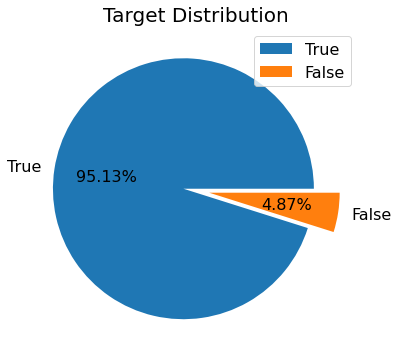

In [30]:
plt.figure(figsize = (6, 6))
plt.pie(stroke_data['stroke'].value_counts(), explode = [0.1, 0.1], labels = ['True', 'False'], autopct = '%.2f%%', shadow = False, textprops = {'fontsize': 16})
plt.title('Target Distribution', fontdict = {'fontsize': 20})
plt.legend(prop = {'size': 16})
plt.show()

Distribution is not even, may need under sampling or over sampling

##### Continuous features

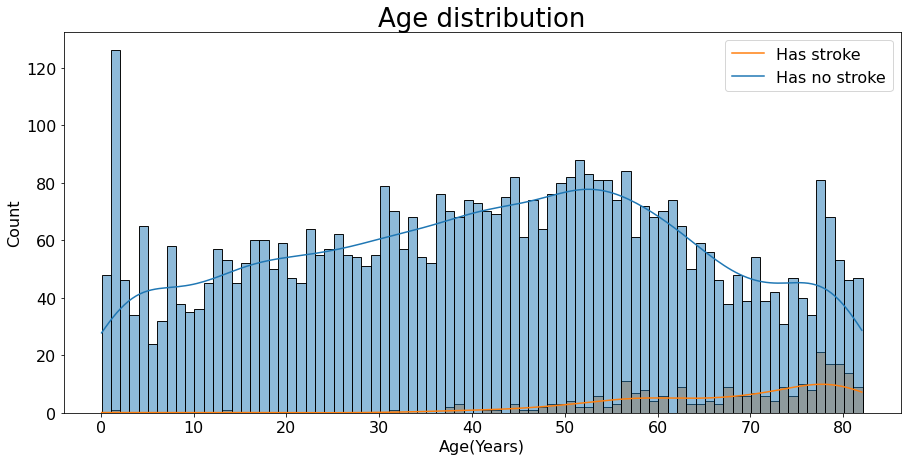

In [47]:
plt.figure(figsize = (15, 7))
sns.histplot(data = stroke_data, x = 'age', hue = 'stroke', binwidth = 1, kde = True)
plt.legend(labels = ['Has stroke', 'Has no stroke'], prop = {'size': 16})
plt.title('Age distribution', fontdict = {'fontsize': 26})
plt.xlabel('Age(Years)', fontdict = {'fontsize': 16})
plt.xticks(np.arange(0, 90, 10), fontsize = 16)
plt.ylabel('Count', fontdict = {'fontsize': 16})
plt.yticks(fontsize = 16)
plt.show()

Easy to find out that:
Patients under 40 years old barely have stroke
A small portion of patients from 40 to 65 years old have stroke
A greater percentage of patients over 65 years old have stroke
So we may divide the age feature into three groups

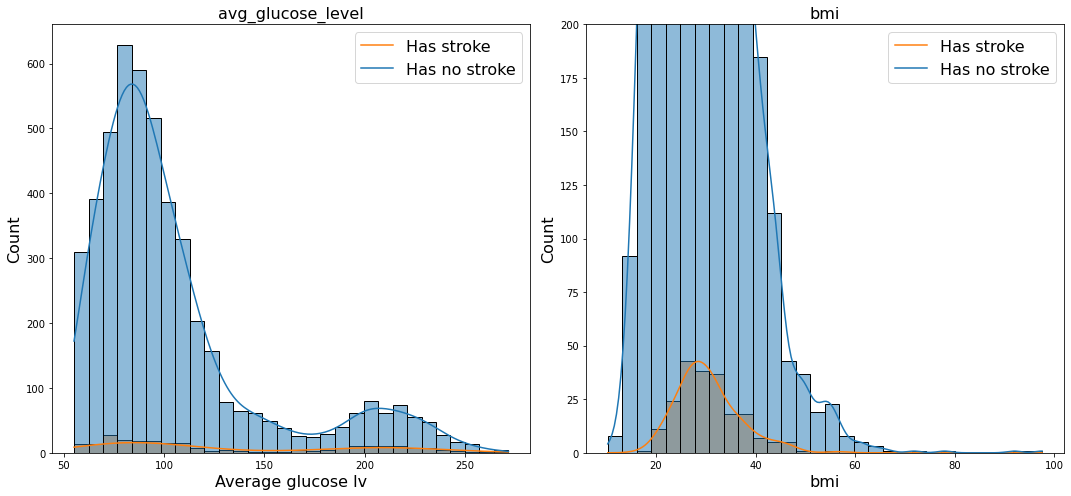

In [66]:
# Glucose and bmi
glu_bmi = ['avg_glucose_level', 'bmi']

fig = plt.figure(figsize = (15, 7))
for i, var in enumerate(glu_bmi):
    ax1 = fig.add_subplot(1, 2, )
    sns.histplot(data = stroke_data, x = 'avg_glucose_level', axes = ax1, hue = 'stroke', kde = True, bins = 30)
    ax1.set_title('avg_glucose_level', fontdict = {'fontsize': 16})
    ax1.legend(labels = ['Has stroke', 'Has no stroke'], prop = {'size': 16})
    ax1.set_xlabel('Average glucose lv', fontdict = {'fontsize': 16})
    ax1.set_ylabel('Count', fontdict = {'fontsize': 16})

    ax2 = fig.add_subplot(1, 2, 2)
    sns.histplot(data = stroke_data, x = 'bmi', axes = ax2, hue = 'stroke', kde = True, bins = 30)
    ax2.set_title('bmi', fontdict = {'fontsize': 16})
    ax2.legend(labels = ['Has stroke', 'Has no stroke'], prop = {'size': 16})
    ax2.set_xlabel('bmi', fontdict = {'fontsize': 16})
    ax2.set_ylabel('Count', fontdict = {'fontsize': 16})
    ax2.set_ylim([0, 200])

fig.tight_layout()
plt.show()